In [156]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator


#from matplotlib.colors import LinearSegmentedColormap

#from matplotlib.animation import FuncAnimation

from matplotlib import rcParams

rcParams['font.size'] = 8
rcParams['mathtext.fontset'] = 'custom'
#from ipywidgets import interact, IntSlider

#from scipy import special
#from scipy.integrate import quad


import re
import os 

In [157]:
directory = "results_files/"

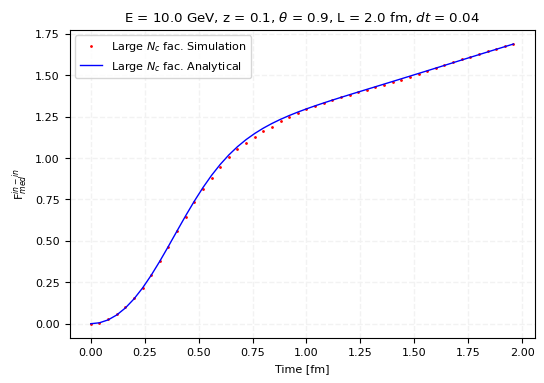

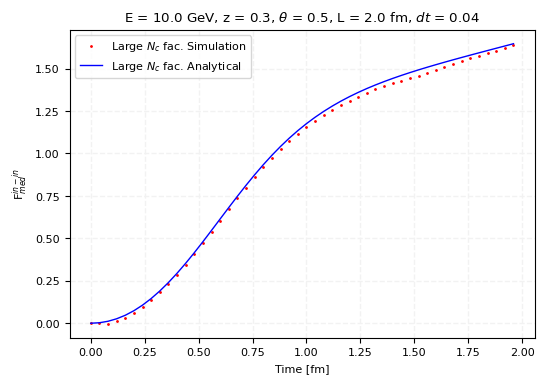

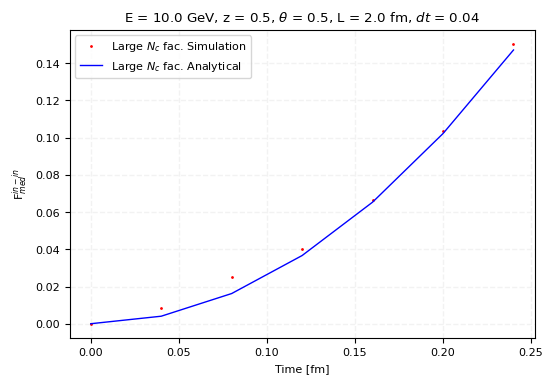

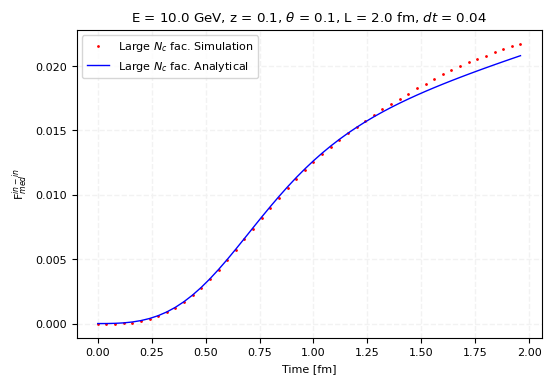

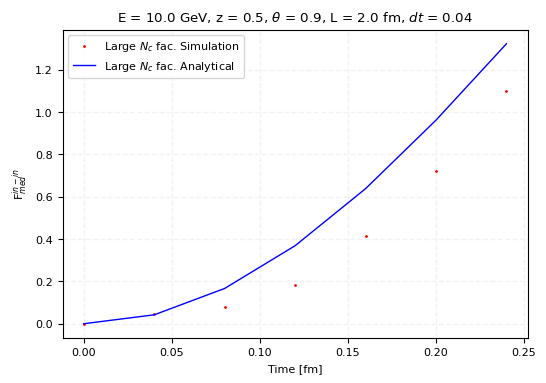

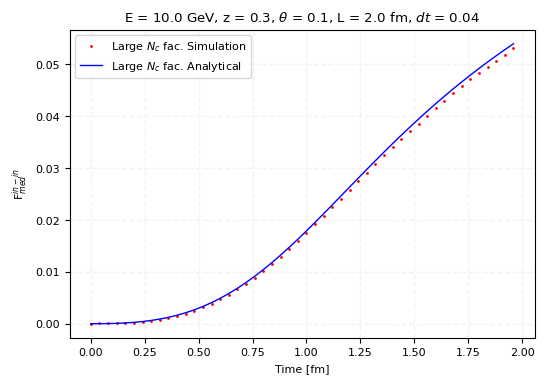

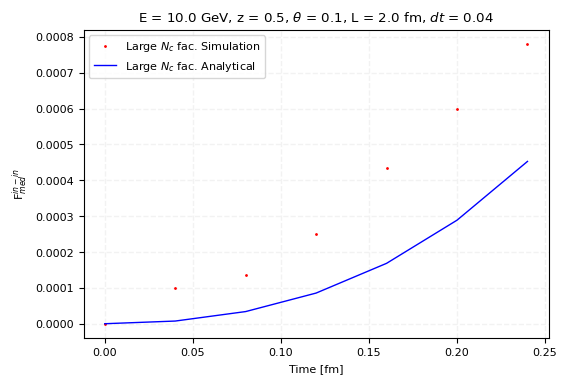

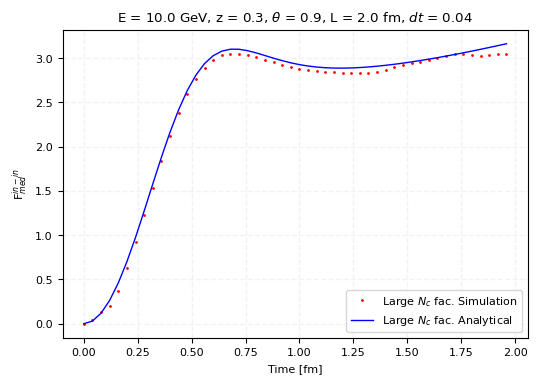

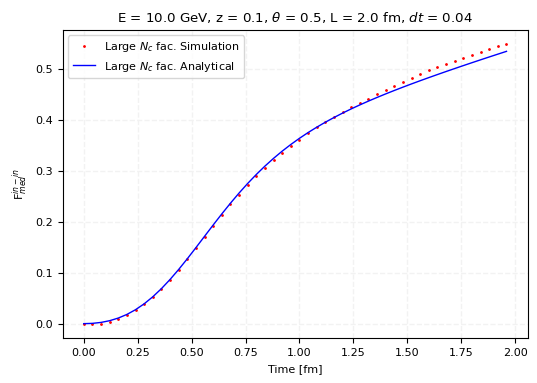

In [158]:
def plot(time, Fmed, Fmed_Nc, label_1, filename):

    fig, ax1 = plt.subplots(figsize=(6,4))

    plt.title(label_1)
    ax1.plot(time, Fmed, 'o', markersize = 1.0, label = "Large $N_c$ fac. Simulation", color = "red")
    ax1.plot(time, Fmed_Nc,  linewidth = 1.0, label = "Large $N_c$ fac. Analytical", color = "blue")

    ax1.grid(True)
    ax1.grid(color='0.95', linestyle='--', linewidth=1)

    plt.ylabel("F$_{med}^{in-in}$")
    plt.xlabel("Time [fm]")

    #fig.text(0.7, 0.3, "Exponential Integrator + Faber", 
         #fontsize=9, color='black', ha='center')


    plt.legend()

    plt.savefig("plots/"+ filename[:-4] + ".png", format= "png")

    plt.show()


for filename in os.listdir(directory):
    load = np.loadtxt("results_files/" + filename)
    time = load[:, 0]
    Fmed = load[:, 1]
    Fmed_Nc = load[:, 2]

    match_E = re.search(r"E=(-?\d+(\.\d+)?)", filename)
    match_L = re.search(r"L=(-?\d+(\.\d+)?)", filename)
    match_z = re.search(r"z=(-?\d+(\.\d+)?)", filename)
    match_theta = re.search(r"theta=(-?\d+(\.\d+)?)", filename)
    match_LargeNc = re.search(r"LargeNc", filename)
    match_FiniteNc = re.search(r"FiniteNc", filename)
    matchN = re.search(r"N=(\d+)", filename)
    matchdt = re.search(r"dt=(-?\d+(\.\d+)?)", filename)

    label = fr"E = {match_E.group(1)} GeV, z = {match_z.group(1)}, $\theta$ = {match_theta.group(1)}, L = {match_L.group(1)} fm, $dt$ = {matchdt.group(1)}"

    E = float(match_E.group(1))
    z = float(match_z.group(1))
    theta = float(match_theta.group(1))
    fm = 5.067

    omega = E* fm * z * (1 - z)
    Omega = (1 - 1j)/2 * np.sqrt(1.5 * fm**2 / omega)
    Finout = np.real(-2 * (1 - np.exp(-1j * np.tan(Omega * time) / (2* omega * Omega)* omega **2 * theta**2)))

    plot(time, Fmed , Fmed_Nc , label, filename)

    




